In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
x=dataset.iloc[:,3:5].values

In [5]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [22]:
from sklearn.cluster import MeanShift, estimate_bandwidth
# Estimate the bandwidth of the input data
bandwidth = estimate_bandwidth(x, quantile=0.2, n_samples=200)

C:\Anaconda\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Anaconda\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')


In [36]:
bandwidth

27.161411938994306

In [23]:
meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
meanshift.fit(x)

C:\Anaconda\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Anaconda\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Anaconda\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Anaconda\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Anaconda\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version cla

MeanShift(bandwidth=27.161411938994306, bin_seeding=True, cluster_all=True,
          min_bin_freq=1, n_jobs=None, seeds=None)

In [24]:
y_meanshift=meanshift.predict(x)

In [25]:
y_meanshift

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int64)

In [26]:
dataset['clusters_group']=y_meanshift

In [27]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


In [28]:
dir(meanshift)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 'bandwidth',
 'bin_seeding',
 'cluster_all',
 'cluster_centers_',
 'fit',
 'fit_predict',
 'get_params',
 'labels_',
 'min_bin_freq',
 'n_jobs',
 'predict',
 'seeds',
 'set_params']

In [29]:
centroids = meanshift.cluster_centers_
n_clusters = len(centroids)
labels=meanshift.labels_

In [30]:
centroids

array([[54.95402299, 48.73563218],
       [81.88888889, 81.5       ],
       [82.2       , 19.37142857]])

In [31]:
n_clusters

3

In [32]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int64)

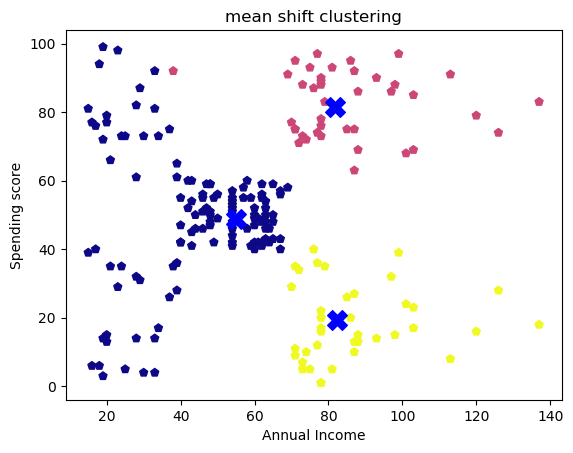

In [33]:
# Plot the results
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='plasma', marker='p')
plt.scatter(meanshift.cluster_centers_[:, 0], meanshift.cluster_centers_[:, 1], s=200, c='blue', marker='X')
plt.title('mean shift clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.show()

In [34]:
# Visualize the results
#plt.scatter(x[:, 0], x[:, 1], c=meanshift.labels_, cmap='viridis', marker='o')
#plt.scatter(meanshift.cluster_centers_[:, 0], meanshift.cluster_centers_[:, 1], 
           # c='red', marker='x', s=200, linewidths=1, label='Cluster Centers')
#plt.title('Mean Shift Clustering')
#plt.legend()
#plt.show()

C:\Anaconda\envs\aiml\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


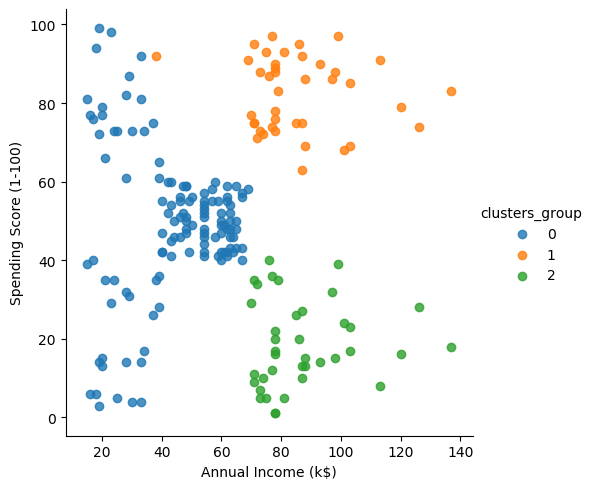

In [35]:
import seaborn as sns
facet=sns.lmplot(data=dataset,x=dataset.columns[3],y=dataset.columns[4],hue=dataset.columns[5],fit_reg=False,legend=True,legend_out=True)